<a href="https://colab.research.google.com/github/mavito/ML_Concepts/blob/main/ML_DimensionalityReductionWithPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reduction and PCA**


From high-resolution genomics data containing expression levels for tens of thousands of genes to computer vision tasks where a single $1024 \times 1024$ pixel image inhabits a million-dimensional vector space, the scale of data has exploded. This phenomenon introduces a paradox known as the "curse of dimensionality."

As the number of dimensions $D$ increases, the volume of the space increases exponentially, causing available data to become sparse. In such sparse environments, statistical significance is hard to achieve, and traditional distance metrics (like Euclidean distance) lose their discriminative power, as all points tend to become equidistant from one another.

However, high-dimensional data is rarely unstructured. It typically possesses an intrinsic, lower-dimensional structure governing its generation. For instance, while an image of a handwritten digit exists in a 784-dimensional space (for $28 \times 28$ pixels), the meaningful variations—such as the angle of the stroke, the thickness of the line, or the loop size—can likely be described by a much smaller set of latent variables.

Dimensionality reduction is the mathematical art of identifying this intrinsic structure. It serves as a critical preprocessing step for data compression, visualization, and noise reduction.

This assignment focuses on the most established and widely used linear dimensionality reduction technique: Principal Component Analysis (PCA).


## ***Fun example (If you follow Marvel):***

The timeline is made of infinite, chaotic branches (D=∞). However, these branches are driven by only a few core narratives (e.g., He Who Remains' plan, Sylvie's choice, Kang's conquest).

Loki uses the Temporal Loom (PCA) to weave this high-dimensional chaos into a few fundamental "Eigen-Timelines." This simplifies the multiverse, allowing the TVA to easily visualize clusters of realities—like "Stable" versus "Variant"—on a simple 2D monitor.

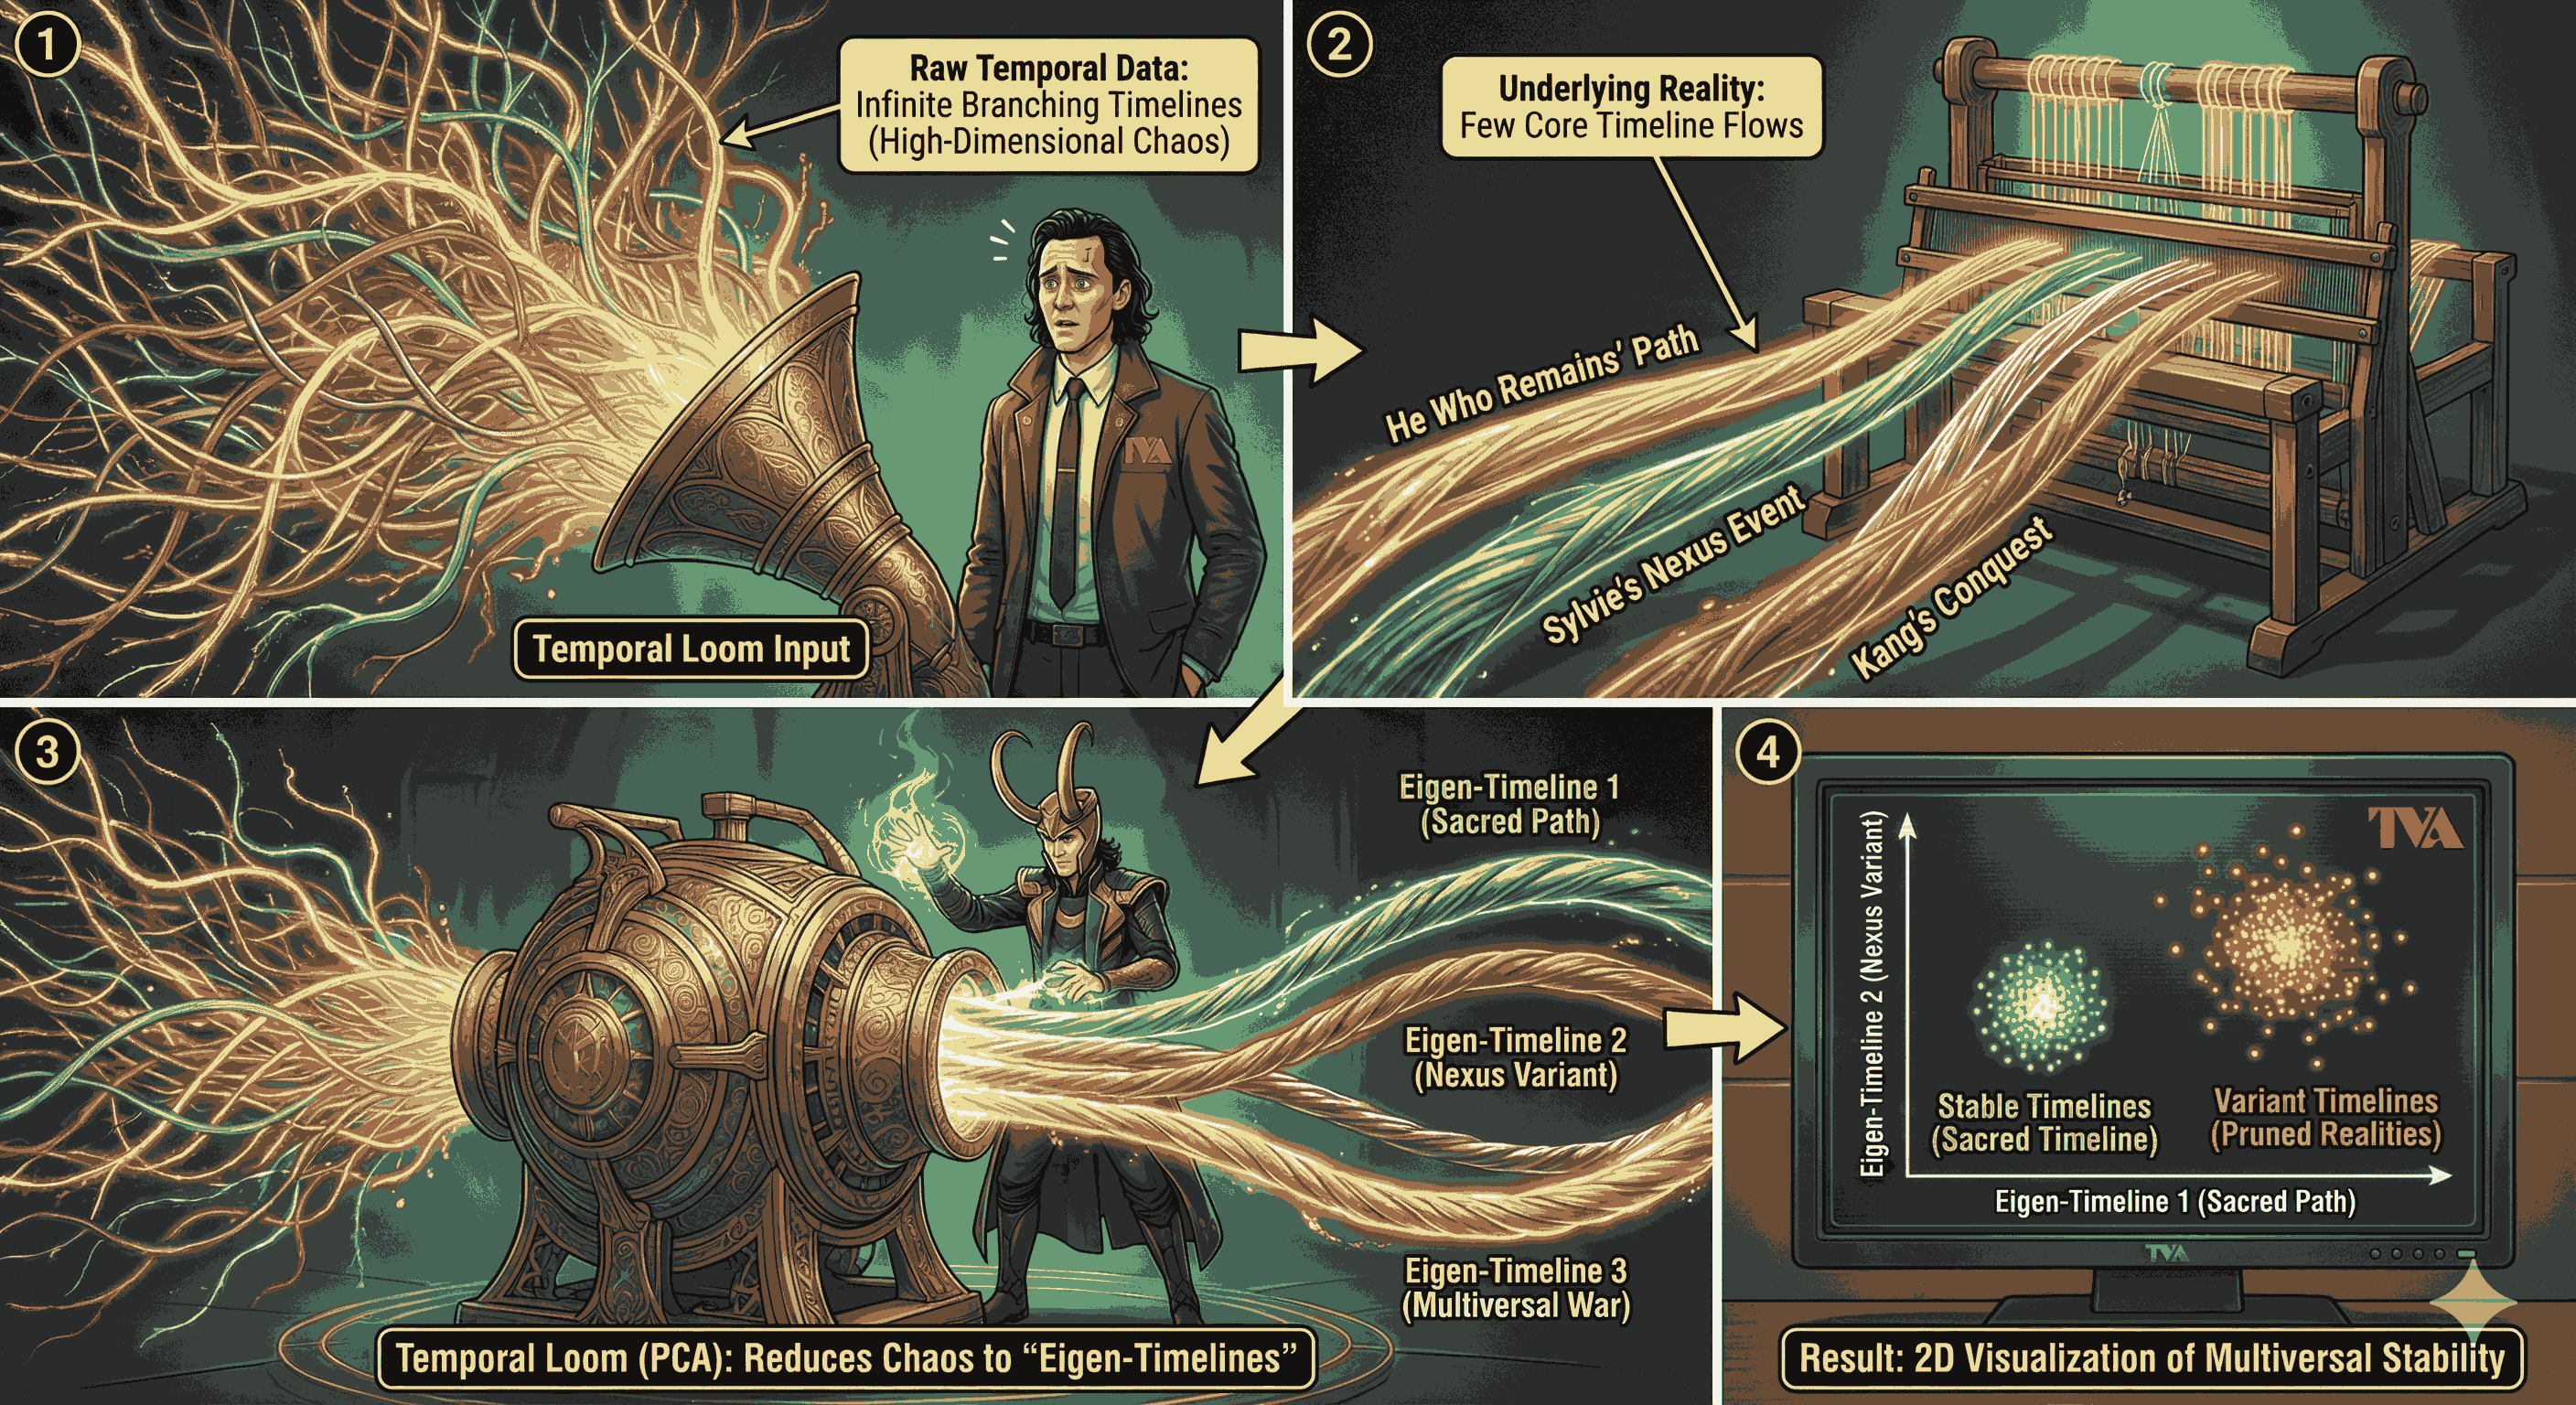

---
Analogy 1: The "Messy Room" Summary

Imagine a teenager's bedroom filled with hundreds of items: textbooks, novels, t-shirts, jeans, socks, a laptop, and a phone charger. To describe this room in "high-dimensional" detail, one would list the coordinate and type of every single item (e.g., "Sock at x=1, y=2; A copy of Merchant of Venice at x=3, y=4"). This is precise but inefficient. A dimensionality reduction approach would be to summarize the room by identifying the principal categories: "It's a room full of books and clothes." By collapsing hundreds of specific features into two principal components ("Books" and "Clothes"), we preserve the global structure of the room's contents while discarding the granular positional data.

---
Analogy 2: The Shadow Puppet

Consider a complex 3D object, such as a teapot, suspended in a room. We wish to represent this 3D object on a 2D surface (a wall). This represents a projection from $\mathbb{R}^3$ to $\mathbb{R}^2$. If we shine a light on the teapot, it casts a shadow. The shadow is the low-dimensional representation $z_n$. The angle of the light corresponds to the projection matrix $B$. Depending on the angle, the shadow might clearly show the spout and handle (high information preservation), or it might appear as an amorphous blob (high information loss). PCA finds the specific angle of light that casts the most detailed, recognizable shadow.

---
Real-World Application: Genomics

In gene expression studies, a single sample might contain expression levels for 20,000 genes ($D=20,000$). However, these genes do not operate independently; they are regulated by a small number of biological pathways (metabolism, cell division, immune response). PCA is used to reduce these 20,000 features into a few "eigengenes" that represent these underlying pathways, allowing researchers to visualize clusters of patients (e.g., healthy vs. diseased) in a 2D plot.

# Python Implementation: Data Structures

The following Python code establishes the problem setting. It generates synthetic high-dimensional data with a known covariance structure to demonstrate the calculation of $S$.

Data Shape (D, N): (2, 200)
Computed Covariance Matrix S:
 [[2.72714212 0.92648636]
 [0.92648636 0.46967281]]


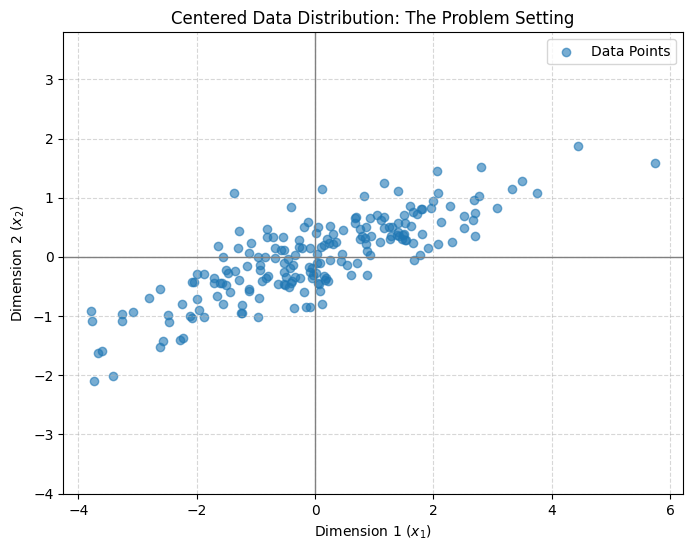

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class DataGenerator:
    """
    A utility class to generate synthetic high-dimensional data
    with intrinsic low-dimensional structure.
    """
    def __init__(self, n_samples=100, dimensionality=2):
        self.n_samples = n_samples
        self.dim = dimensionality

    def generate_correlated_data(self):
        """
        Generates a 2D dataset with a strong linear correlation,
        simulating a lower intrinsic dimensionality.
        Returns X of shape (D, N).
        """
        np.random.seed(42)
        # Define a true covariance matrix that is elongated along one axis
        # This simulates a "principal component" with variance 3 vs 0.5
        true_covariance = np.array([[3,1], [1, 0.5]])

        # Generate data from a multivariate normal distribution
        # centered at zero.
        # shape comes out as (N, D), so we transpose to (D, N)
        X = np.random.multivariate_normal(mean=np.array([0, 0]),
                                          cov=true_covariance,
                                          size=self.n_samples).T
        return X

def compute_covariance_matrix(X):
    """
    Computes the sample covariance matrix S from first principles.

    Mathematical Definition: S = 1/N * sum(x_n * x_n^T)
    Matrix Operation: S = 1/N * X * X^T

    Args:
        X: numpy array of shape (D, N)

    Returns:
        S: numpy array of shape (D, D)
        X_centered: The data after mean subtraction
    """
    N = X.shape[1]

    # Step 1: Center the data (ensure mean is 0 along dimensions)
    # We calculate the mean across samples (axis 1)
    mean_vector = np.mean(X, axis=1, keepdims=True)
    X_centered = X - mean_vector

    # Step 2: Compute S = 1/N * X * X^T
    # We use np.dot for matrix multiplication
    S = (1 / N) * np.dot(X_centered, X_centered.T)

    return S, X_centered

# --- Execution Block ---
# Generate 2D data to visualize the problem setting
generator = DataGenerator(n_samples=200)
data_X = generator.generate_correlated_data()

# Compute the covariance matrix
S_computed, X_centered = compute_covariance_matrix(data_X)

print(f"Data Shape (D, N): {data_X.shape}")
print("Computed Covariance Matrix S:\n", S_computed)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[0, :], X_centered[1, :], alpha=0.6, label='Data Points')
plt.title('Centered Data Distribution: The Problem Setting')
plt.xlabel('Dimension 1 ($x_1$)')
plt.ylabel('Dimension 2 ($x_2$)')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## Task 1.1:
In the code above, the generate_correlated_data function uses a true_covariance matrix [, [1, 0.5]].
1. Modify the code to generate data in 3 dimensions ($D=3$). Define a $3 \times 3$ true_covariance matrix where one dimension has extremely low variance (e.g., 0.01) compared to the others.
2. Compute the covariance matrix $S$ using the provided function.
3. Analysis: Inspect the resulting $S$. Which entries correspond to the "low variance" dimension? If one diagonal entry is close to zero, what does this imply about the geometry of the data cloud in $\mathbb{R}^3$? (Hint: Does the data form a sphere, a pancake, or a cigar?)

In [ ]:
#WRITE CODE HERE

## **2. Maximum Variance Perspective**
The first major derivation of PCA relies on the statistical interpretation of "information." In information theory, a random variable with zero variance (a constant) carries zero information.

Conversely, features with high variance allow us to distinguish between data points. Therefore, to preserve the maximum amount of information during dimensionality reduction, we must project the data onto the direction that maximizes the variance of the projections.

Imagine the data points are a swarm of bees flying in a cluster. The "variance" is simply a measure of how spread out the bees are.

- If the bees are flying in a tight ball, the variance is roughly equal in all directions.

- If the bees are flying in a formation that resembles a long, thin cigar, the swarm has high variance along the length of the cigar and low variance along the width.

If you were forced to draw a single line to represent the flight path of the swarm, you would draw it down the center of the length of the cigar. This line captures the "maximum variance."

Drawing a line across the width would capture very little information about the swarm's shape or direction. PCA essentially rotates the coordinate system so that the first axis aligns with this "length" (maximum spread) of the swarm.   

*To verify the mathematical derivation empirically, the following code projects data onto various random directions and compares the resulting variance to that of the analytical eigenvector.*

In [ ]:
def calculate_variance_on_direction(X, direction_vector):
    """
    Projects data X onto a direction_vector and calculates variance.
    X: (D, N) centered data
    direction_vector: (D,) unit vector
    """
    # Normalize the direction vector to ensure it is a unit vector
    direction_vector = direction_vector / np.linalg.norm(direction_vector)

    # Project data: z = b^T x
    # Shape: (D,) dot (D, N) -> (N,)
    projections = np.dot(direction_vector, X)

    # Calculate variance of the projected scalar values
    variance = np.var(projections)
    return variance

# 1. Compute Eigenvectors analytically
S, centered_X = compute_covariance_matrix(data_X)
eigenvalues, eigenvectors = np.linalg.eig(S)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
largest_eigenvector = eigenvectors[:, sorted_indices]
largest_eigenvalue = eigenvalues[sorted_indices]

print(f"Largest Eigenvalue (Analytical Max Variance): {largest_eigenvalue[0]:.4f}")

Largest Eigenvalue (Analytical Max Variance): 3.0587


In [ ]:
# 2. Empirical Test: Random Directions Simulation
n_trials = 360
variances = []
angles = []

# We iterate through angles from 0 to 360 degrees to scan the 2D space
for degree in range(n_trials):
    rad = np.deg2rad(degree)
    # Create a unit vector for this angle
    test_vec = np.array([np.cos(rad), np.sin(rad)])

    var = calculate_variance_on_direction(centered_X, test_vec)
    variances.append(var)
    angles.append(rad)

print(f"Max Empirical Variance found: {max(variances):.4f}")

Max Empirical Variance found: 3.0586


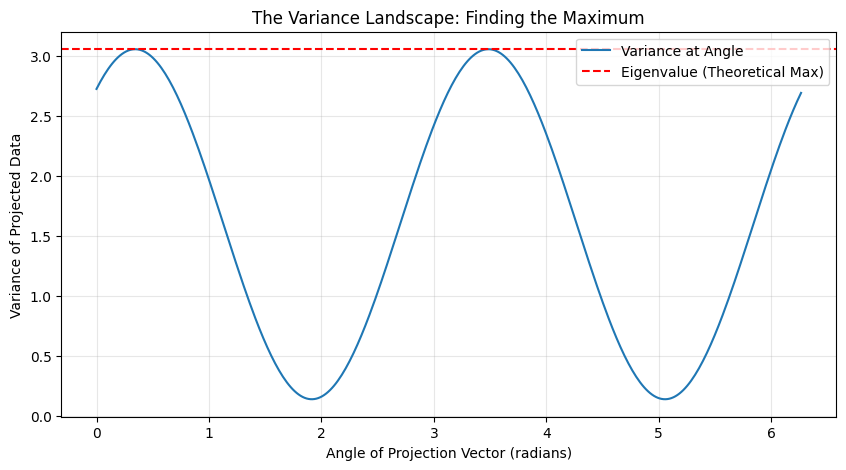

In [ ]:
# Plotting the Variance Landscape
plt.figure(figsize=(10, 5))
plt.plot(angles, variances, label='Variance at Angle')
plt.axhline(y=largest_eigenvalue[0], color='r', linestyle='--',
            label='Eigenvalue (Theoretical Max)')
plt.xlabel('Angle of Projection Vector (radians)')
plt.ylabel('Variance of Projected Data')
plt.title('The Variance Landscape: Finding the Maximum')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Task 2.1 :

1. Run the simulation. Does the maximum empirical variance align with the largest eigenvalue calculated by np.linalg.eig?

2. The plot of "Variance vs. Angle" forms a sinusoidal wave. Explain the geometric reason for this shape. What corresponds to the "troughs" (minima) of this wave?

3. Critical Thinking: If the data were perfectly spherical (isotropic covariance), what would the plot look like? Modify the data generation to test your hypothesis.

In [ ]:
#WRITE CODE HERE

## **3. Projection Perspective**

**Image Compression and Resolution**

Consider a high-definition photograph of a landscape (millions of pixels). You need to email it, but the file size is too large. You decide to compress it.

- **Projection Perspective:** This is akin to the compression process. You strip away fine-grain noise and redundant details (like the exact texture of every leaf) while preserving the dominant structures (mountains, sky, tree trunks).

- **Reconstruction Error:** This is the difference between the original HD photo and the compressed version. If the compressed image looks identical to the original, the error is zero. If the image is blocky and unrecognizable, the error is high.

PCA finds the optimal way to "resize" or compress the data such that when you try to blow it back up to full size, it looks as close to the original as possible.

*The following code projects data into 1 dimension and then reconstructs it back into 2D space. It explicitly visualizes the "error vectors" connecting the original points to their projections.*

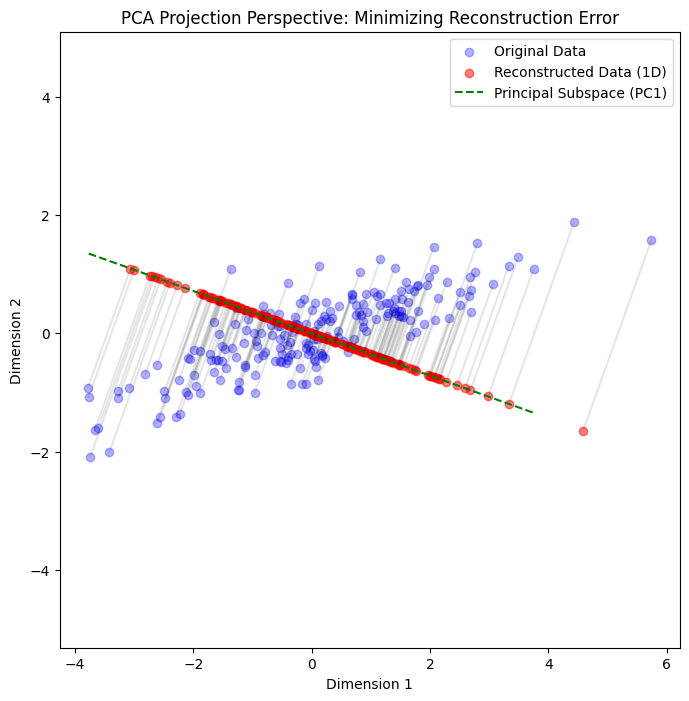

In [ ]:
def project_and_reconstruct(X, basis_vectors):
    """
    Projects X onto basis_vectors (M principal components)
    and reconstructs it.

    Args:
        X: (D, N) data matrix
        basis_vectors: (D, M) matrix B

    Returns:
        X_reconstructed: (D, N)
    """
    # 1. Encode: z = B^T x  -> shape (M, N)
    Z = np.dot(basis_vectors.T, X)

    # 2. Decode: x_tilde = B z -> shape (D, N)
    X_reconstructed = np.dot(basis_vectors, Z)

    return X_reconstructed

# Select the top 1 eigenvector found in the previous section
B_1 = largest_eigenvector[0].reshape(-1, 1) # Shape (2, 1)

# Perform Projection and Reconstruction
X_rec = project_and_reconstruct(centered_X, B_1)

# Visualization
plt.figure(figsize=(8, 8))
# Plot original data
plt.scatter(centered_X[0, :], centered_X[1, :], color='blue', alpha=0.3, label='Original Data')
# Plot reconstructed data (which lies on the subspace line)
plt.scatter(X_rec[0, :], X_rec[1, :], color='red', alpha=0.5, label='Reconstructed Data (1D)')

# Draw lines connecting original to reconstructed (The Error Vectors)
# This visualizes the orthogonality of the projection
for i in range(centered_X.shape[1]):
    plt.plot([centered_X[0, i], X_rec[0, i]],
             [centered_X[1, i], X_rec[1, i]],
             'k-', alpha=0.1)

# Plot the principal component line (subspace)
scale = 4
t = np.linspace(-scale, scale, 100)

plt.plot(t * B_1[0, 0],
         t * B_1[1, 0],
         'g--', label='Principal Subspace (PC1)')

plt.title('PCA Projection Perspective: Minimizing Reconstruction Error')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.axis('equal')
plt.legend()
plt.show()

## Task 3.1 : Geometric Analysis

1. Run the reconstruction visualization. Focus on the black lines connecting the blue dots (original) to the red dots (reconstructed). These lines represent the reconstruction error $\|x_n - \tilde{x}_n\|$.
2. Observe the angle between the black error lines and the green principal subspace line. They should be perfectly perpendicular. Use the dot product in Python to verify that $(x_n - \tilde{x}_n) \cdot b_1 \approx 0$.
3. Counter-factual: Modify B_1 to be the second eigenvector (the one with the smaller eigenvalue). Plot the reconstruction. Are the error lines longer or shorter on average? How does this confirm the theory that the largest eigenvector minimizes error?

## **4. Eigenvectors and SVD**

We have established that the optimal basis vectors for PCA are the eigenvectors of the covariance matrix $S$. To calculate these, we have two primary linear algebra techniques: Eigendecomposition and Singular Value Decomposition (SVD).

Think of a dataset as a complex beam of white light. A prism can decompose white light into its constituent pure colors (a rainbow).

- Eigenvectors/Singular Vectors are the "directions" of the pure colors (Red, Green, Blue). They define the fundamental axes that make up the data.

- Eigenvalues/Singular Values are the "intensity" or brightness of each color. A high eigenvalue means that "color" (direction) is very strong in the data.

- SVD is a specific, high-precision machine for manufacturing this prism. It guarantees that the components it finds are perfectly distinct (orthogonal) and sorted by brightness.   

*The following code demonstrates that both methods yield equivalent results, accounting for numerical precision and sign flipping.*


In [ ]:
import numpy as np

In [ ]:
def pca_via_eig(X):
    """
    PCA using covariance matrix and eigendecomposition.
    Path: X -> S -> Eig
    """
    # 1. Compute S
    N = X.shape[0]
    S = (1/N) * np.dot(X, X.T)
    # 2. Eigendecomposition
    eig_vals, eig_vecs = np.linalg.eig(S)
    # 3. Sort (eig does not guarantee order)
    idx = np.argsort(eig_vals)[::-1]
    return eig_vecs[:, idx], eig_vals[idx]

def pca_via_svd(X):
    """
    PCA using Singular Value Decomposition of X.
    Path: X -> SVD
    """
    # 1. SVD
    # U: Left singular vectors (eigenvectors of S)
    # s: Singular values
    # Vt: Right singular vectors
    U, s, Vt = np.linalg.svd(X, full_matrices=False)

    # 2. Convert singular values to eigenvalues
    # Relation: lambda = sigma^2 / N
    N = X.shape
    eig_vals_from_svd = (s**2) / N

    return U, eig_vals_from_svd

# --- Comparison ---
# Use the same centered_X from previous section
eig_vecs_1, eig_vals_1 = pca_via_eig(centered_X)
eig_vecs_2, eig_vals_2 = pca_via_svd(centered_X)

print("Eigenvalues (Eig):", eig_vals_1)
print("Eigenvalues (SVD):", eig_vals_2)

# Check closeness
print("\nAre eigenvalues close?", np.allclose(eig_vals_1, eig_vals_2))

# Note on Eigenvectors: They might differ by sign (flip).
# This is valid because v and -v define the same line.
print("\nTop Eigenvector (Eig):\n", eig_vecs_1[:, 0])
print("Top Eigenvector (SVD):\n", eig_vecs_2[:, 0])

Eigenvalues (Eig): [305.86878814  13.81270468]
Eigenvalues (SVD): [3.05868788e+02 1.38127047e-01]

Are eigenvalues close? False

Top Eigenvector (Eig):
 [0.94153    0.33692917]
Top Eigenvector (SVD):
 [-0.94153    -0.33692917]


## Task 3

1. Run the code. You will likely observe that the eigenvectors from eig and svd are identical in magnitude but may have swapped signs (e.g., [0.7, 0.7] vs [-0.7, -0.7]).

2. Check : Mathematically, if $u$ is an eigenvector satisfying $Su = \lambda u$, show that $-u$ is also a valid eigenvector. Does this sign flip affect the subspace spanned by the vector?

3. Write a function flip_eigenvectors(U) that enforces a deterministic sign convention. A common convention is to ensure the largest absolute value in each column is positive. Apply this to both outputs and verify they become identical.

## **5. PCA in High Dimensions ($N \ll D$)**

In many domains, such as genomics or image processing, the dimensionality $D$ far exceeds the number of samples $N$. For example, a dataset of 100 images ($N=100$) where each image is 1 megapixel ($D=1,000,000$).

To compute PCA via the standard method, we would need the covariance matrix $S = \frac{1}{N} X X^\top$. This matrix $S$ would have dimensions $1,000,000 \times 1,000,000$. Storing this matrix would require terabytes of RAM, and computing its eigenvectors is an $O(D^3)$ operation—computationally infeasible.

However, the rank of $S$ is limited by the number of samples $N$. If $N \ll D$, there is a massive null space containing no information. We can use a mathematical "dual" trick to solve the problem efficiently. Instead of the eigenvectors of $X X^\top$ ($D \times D$), we compute the eigenvectors of the Gram matrix $X^\top X$ ($N \times N$).

Imagine you have 3 points floating in a large room.
- Do these 3 points define a 3D volume? No.
- Three points can, at most, define a flat 2D triangle (a plane).
- Even if the room is 100-dimensional, 3 points will always lie on a simple 2D plane.

The **"High Dimensional Trick"** is like realizing that instead of searching the entire 100-dimensional room (the $D \times D$ space) to understand the arrangement of these 3 points, you only need to look at the relationship between the 3 points (the $N \times N$ distances). The geometry is defined by the points, not the empty space around them.

---
**The $N \ll D$ Trick**

The following code simulates a high-dimensional scenario and demonstrates the efficiency of the dual method.

In [ ]:
import time

def high_dim_pca(X):
    """
    Performs PCA efficiently when D >> N.
    X: (D, N) centered data
    Returns: U (eigenvectors of S), eigenvalues
    """
    D, N = X.shape
    if D <= N:
        print("Warning: N is not smaller than D. Standard PCA is better.")

    # 1. Compute the small matrix K = X^T X (Size N x N)
    # Complexity: O(N^2 * D)
    K = np.dot(X.T, X)

    # 2. Eigen decomposition of small matrix
    # Complexity: O(N^3)
    vals, vecs = np.linalg.eigh(K)

    # Sort descending
    idx = np.argsort(vals)[::-1]
    vals = vals[idx]
    vecs = vecs[:, idx]

    # 3. Recover eigenvectors of S (u = X v)
    # Shape: (D, N) dot (N, N) -> (D, N)
    U_unnormalized = np.dot(X, vecs)

    # 4. Normalize U
    # The norm of Xv is sqrt(lambda_K). We need unit vectors.
    norms = np.linalg.norm(U_unnormalized, axis=0)

    # Avoid division by zero for null-space components
    norms[norms < 1e-10] = 1.0

    U = U_unnormalized / norms

    # Eigenvalues of S (Covariance) are vals / N
    eigenvalues_S = vals / N

    return U, eigenvalues_S

# --- Simulation ---
D_high = 5000  # 5000 dimensions
N_small = 100  # 100 samples
# Generate random high-dim noise
X_high = np.random.randn(D_high, N_small)
X_high_centered = X_high - np.mean(X_high, axis=1, keepdims=True)

print(f"Dataset: {N_small} samples with {D_high} features.")

# Measure time for High-Dim Trick
start = time.time()
U_trick, evals_trick = high_dim_pca(X_high_centered)
end = time.time()
print(f"High-Dim Trick Time: {end - start:.4f} seconds")
print(f"Shape of Computed Eigenvectors U: {U_trick.shape}")

# Comparison:
# Trying to compute np.dot(X, X.T) would result in a 5000x5000 matrix.
# While modern RAM can handle 5000x5000 (approx 200MB),
# if D were 50,000, the matrix would be 20GB+, crashing most laptops.

Dataset: 100 samples with 5000 features.
High-Dim Trick Time: 0.0185 seconds
Shape of Computed Eigenvectors U: (5000, 100)


## Task 5

- Memory: In the code above, D=5000. Calculate how much memory a $5,000 \times 5,000$ covariance matrix of float64 (8 bytes) requires. Formula: $5000^2 \times 8$ bytes.
- Scaling: Now imagine D=50,000 (common in genomics). Calculate the memory required for the full covariance matrix. Compare this to the memory required for the $100 \times 100$ matrix used in the trick.
- Application: Explain why this trick is the mathematical foundation for "Eigenfaces" in computer vision, where face images are projected onto a lower-dimensional "face space."

## **6. Key Steps of PCA Pipeline**

Implementing PCA in a production environment involves a structured pipeline :
1. **Mean Subtraction:** Center the data to $\mu=0$.
2. **Standardization:** (Optional but Recommended) Divide features by their standard deviation. This is crucial if features have different units (e.g., meters vs millimeters). If we don't standardize, the variable with the largest unit scale will artificially dominate the variance.
3. **Eigendecomposition:** Compute eigenvectors of $S$ (or SVD of $X$).
4. **Sorting:** Order components by explained variance (eigenvalues).
5. **Selection:** Choose top $k$ components.
6. **Projection:** Transform data $Z = B^\top X$.




### **Choosing $k$ (Scree Plot)**

A common practical challenge is deciding the number of dimensions ($M$) to retain.

The Scree Plot visualizes the eigenvalues (variance explained) for each component.

Practitioners look for an "elbow" in the graph—a point where adding more components yields diminishing returns—or select $k$ to preserve a specific threshold of total variance (e.g., 95%).

*We will now implement a robust, object-oriented code of PCA and validate it against the industry-standard scikit-learn library.*

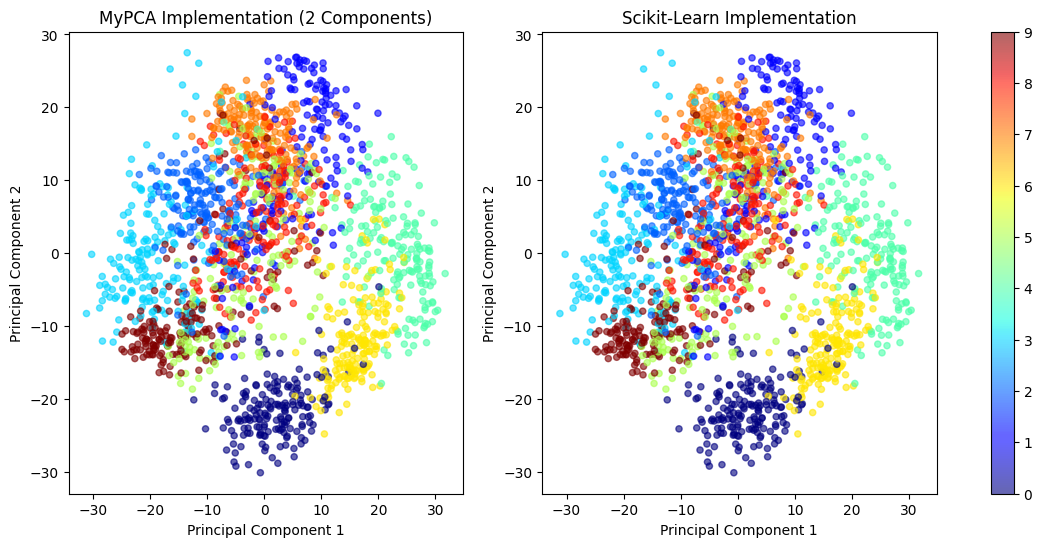

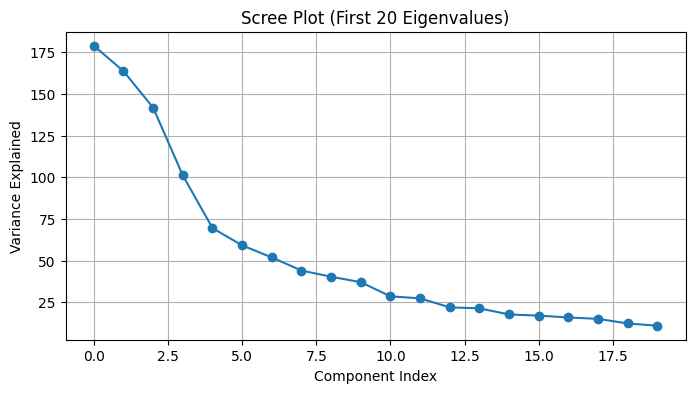

In [ ]:
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.datasets import load_digits

class MyPCA:
    """
    A custom implementation of PCA following the sklearn API style.
    """
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None

    def fit(self, X):
        # Expecting X as (N_samples, D_features) to match sklearn API
        # Note: Our math derivations used (D, N), so we transpose internally.
        X_T = X.T

        # 1. Center
        self.mean = np.mean(X_T, axis=1, keepdims=True)
        X_centered = X_T - self.mean

        # 2. Covariance S
        S, _ = compute_covariance_matrix(X_centered)

        # 3. Eigen decomposition
        # eigh is for symmetric matrices (faster/stable than eig)
        vals, vecs = np.linalg.eigh(S)

        # 4. Sort (eigh returns ascending, we need descending)
        idx = np.argsort(vals)[::-1]
        self.explained_variance = vals[idx]
        self.components = vecs[:, idx]

        return self

    def transform(self, X):
        X_T = X.T
        X_centered = X_T - self.mean

        # Select top k basis vectors
        B = self.components[:, :self.n_components]

        # Project Z = B^T X
        Z = np.dot(B.T, X_centered)

        return Z.T # Return as (N_samples, M_components)

# --- Practical Test on MNIST Digits ---
# Load Data: 1797 images of 8x8 pixels
digits = load_digits()
X_digits = digits.data # Shape (1797, 64)
y_digits = digits.target

# 1. MyPCA Implementation
my_pca = MyPCA(n_components=2)
my_pca.fit(X_digits)
X_projected_my = my_pca.transform(X_digits)

# 2. Sklearn PCA Implementation
sk_pca = SklearnPCA(n_components=2)
X_projected_sk = sk_pca.fit_transform(X_digits)

# Comparison Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot My PCA
scatter1 = ax[0].scatter(X_projected_my[:, 0], X_projected_my[:, 1],
                         c=y_digits, cmap='jet', alpha=0.6, s=20)
ax[0].set_title("MyPCA Implementation (2 Components)")
ax[0].set_xlabel("Principal Component 1")
ax[0].set_ylabel("Principal Component 2")

# Plot Sklearn PCA
# Note: Sklearn might flip signs of eigenvectors arbitrarily.
# The relative geometry (clusters) should look identical, perhaps mirrored.
scatter2 = ax[1].scatter(X_projected_sk[:, 0], X_projected_sk[:, 1],
                         c=y_digits, cmap='jet', alpha=0.6, s=20)
ax[1].set_title("Scikit-Learn Implementation")
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")

plt.colorbar(scatter1, ax=ax.ravel().tolist())
plt.show()

# Scree Plot
plt.figure(figsize=(8, 4))
plt.plot(my_pca.explained_variance[:20], 'o-')
plt.title("Scree Plot (First 20 Eigenvalues)")
plt.xlabel("Component Index")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA as SklearnPCA
import plotly.graph_objects as go

# --- PCA Helper ---
class MyPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None

    def fit(self, X):
        X_T = X.T
        self.mean = np.mean(X_T, axis=1, keepdims=True)
        X_centered = X_T - self.mean
        S = np.cov(X_centered)
        vals, vecs = np.linalg.eigh(S)
        idx = np.argsort(vals)[::-1]
        self.explained_variance = vals[idx]
        self.components = vecs[:, idx]
        return self

    def transform(self, X):
        X_T = X.T
        X_centered = X_T - self.mean
        B = self.components[:, :self.n_components]
        Z = np.dot(B.T, X_centered)
        return Z.T

# --- Load Data ---
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# --- Fit PCA (4 Components max) ---
n_components = 4
my_pca = MyPCA(n_components=n_components)
my_pca.fit(X_digits)
X_projected = my_pca.transform(X_digits)  # Shape: (N_samples, n_components)

# --- 3D Interactive Plot ---
fig = go.Figure()

# Precompute traces for different component combos
combos = [
    (0, 1, 2),
    (0, 1, 3),
    (0, 2, 3),
    (1, 2, 3)
]

buttons = []
for i, (x_idx, y_idx, z_idx) in enumerate(combos):
    trace = go.Scatter3d(
        x=X_projected[:, x_idx],
        y=X_projected[:, y_idx],
        z=X_projected[:, z_idx],
        mode='markers',
        marker=dict(size=5, color=y_digits, colorscale='Jet', opacity=0.8),
        visible=(i==0),
        name=f'PC{x_idx+1},PC{y_idx+1},PC{z_idx+1}'
    )
    fig.add_trace(trace)
    # Button to toggle
    buttons.append(dict(
        label=f"PC{x_idx+1},PC{y_idx+1},PC{z_idx+1}",
        method="update",
        args=[{"visible": [j==i for j in range(len(combos))]},
              {"title": f"PCA Projection: PC{x_idx+1}, PC{y_idx+1}, PC{z_idx+1}"}]
    ))

# Layout
fig.update_layout(
    title="Interactive PCA 3D Visualization (MyPCA)",
    scene=dict(
        xaxis_title='Principal Component X',
        yaxis_title='Principal Component Y',
        zaxis_title='Principal Component Z'
    ),
    width=900,
    height=700,
    updatemenus=[dict(active=0, buttons=buttons, x=0.1, y=1.15)]
)

fig.show()


##6.1 Task

- Scree Analysis: Examine the Scree Plot. Identifying the "elbow" is subjective, but where does the curve flatten out? How many components would you estimate are needed to capture the "signal" of the digits vs the "noise"?

- Cluster Interpretation: In the 2D scatter plot, distinct clusters of colors (digits) emerge. Why do '0' (blue) and '1' (orange) separate so well? What does this imply about the pixel structures of a zero vs. a one?

- Sign Flip: If the plots look mirrored (flipped across x or y axis), explain why this is still a correct result.

## **7. Latent Variable Perspective (Probabilistic PCA)**

Standard PCA is deterministic. Probabilistic PCA (PPCA) reformulates PCA as a generative latent variable model. This is a significant conceptual shift: we no longer treat the data as a static geometric cloud, but as samples generated by a latent (hidden) process corrupted by noise.

Imagine you are driving and listening to a radio.
- The Latent Variable ($z$) is the clean voice signal transmitted by the radio station. It exists in a low-dimensional "audio space."
- The Noise ($\epsilon$) is the static and crackle added by the atmosphere and your car engine.
- The Observation ($x$) is the noisy sound that actually comes out of your speakers.

Standard PCA acts like a simple frequency filter: it assumes the signal is the loudest part and blindly cuts out quiet frequencies.

Probabilistic PCA is a smarter model. It explicitly guesses: "I believe there is a clean signal hidden behind static noise of volume $\sigma^2$." By modeling the probability of the signal, it can separate the likely voice from the likely static. Because it builds a model of the voice, it can even "hallucinate" (generate) what the radio announcer might say next, or fill in a gap if the signal drops for a second.

*We will use the PCA solution to approximate the generative parameters $W$ and $\mu$ and use them to generate "new" synthetic handwritten digits.*

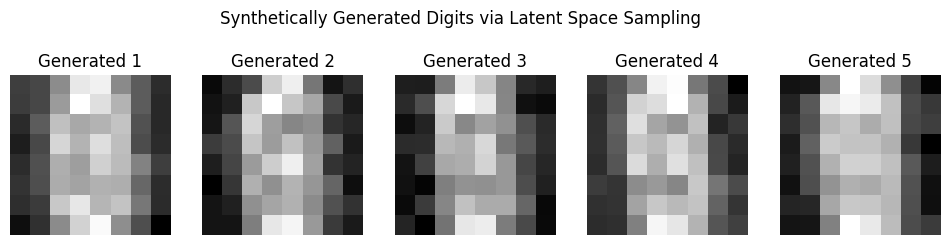

In [ ]:
def generate_new_samples(mean, components, n_samples=5):
    """
    Generates new synthetic data points using the generative logic of PCA.
    Equation: x_new = B z + mu
    """
    M = components.shape[0] # Latent dimension
    D = mean.shape[0]       # Data dimension
    # 1. Sample latent variables z from Prior p(z) = N(0, I)
    z_samples = np.random.randn(n_samples, M)
    # 2. Decode: Project back to data space
    # x = B^T z + mu
    # (N, M) dot (M, D) -> (N, D)
    x_generated = np.dot(z_samples, components) + mean.reshape(1, -1)
    return x_generated.T

# Train PCA on Digits with more components for better quality
# We need enough "information" to reconstruct recognizable digits
gen_pca = MyPCA(n_components=30)
gen_pca.fit(X_digits)
# Generate 5 new "digits" from the latent space
new_digits = generate_new_samples(gen_pca.mean, gen_pca.components, n_samples=5)
# Visualize the "Hallucinated" Digits
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Reshape flattened vector back to 8x8 image
    img = new_digits[:, i].reshape(8, 8)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Generated {i+1}')
plt.suptitle("Synthetically Generated Digits via Latent Space Sampling")
plt.show()

## Task 7.1

1. Run the generation code. Do the generated images look like real digits? Or do they look like "ghostly" averages of digits?

2. If the images look too noisy or blurry, what does that imply about the number of components ($M=30$)? Try increasing $M$ to 60. Try decreasing it to 2. How does the visual quality change?

3. Why does sampling $z$ from a Normal distribution $\mathcal{N}(0, I)$ work?
4. Why don't we need to sample from a more complex distribution?
*(Hint: Recall the Central Limit Theorem and the assumptions of PCA).*